# Análisis de paquetes

In [1]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install import_ipynb
#!pip3 install scapy
import pandas as pd
from scapy.all import *
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utils as utils

importing Jupyter notebook from utils.ipynb


Graficar entropia a medida que llegan paquetes

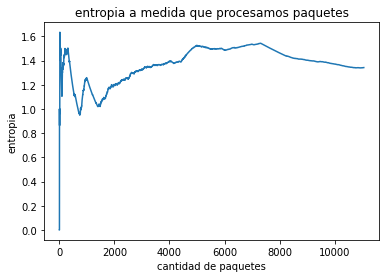

In [2]:
plt.plot(utils.get_entropy())
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [5]:
unicast_broadcast_symbol, protocol, percent_unicast, percent_broadcast= utils.show_source()

print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)


percent unicast 0.86106
percent broadcast 0.13894


<h1>Analisis de los paquetes con Scapy</h1>

In [6]:
#path to the input .pcapng to read
path = 'Lucy_Wifi_Casa/LucyCasa.pcapng'
packets = rdpcap(path)
print(packets)

<LucyCasa.pcapng: TCP:4086 UDP:5500 ICMP:4 Other:1472>


Cantidad de paquetes

In [7]:
def get_packets_amount(file_name):
    count = 0
    for (pkt_data, pkt_metadata,) in RawPcapReader(file_name):
        count += 1
    return count

packets_amount = get_packets_amount(path)
print('{} contains {} packets'.format(path, packets_amount))

Lucy_Wifi_Casa/LucyCasa.pcapng contains 11062 packets


IPs

In [8]:
param = "src"

def count_ips(option):
  ip_count = {}
  for packet in packets:
    if IP in packet:
        if option == "dst" or option == "both":
          dst_ip = packet[IP].dst
          ip_count[dst_ip] = ip_count.get(dst_ip, 0) + 1
        if option == "src" or option == "both":
          src_ip = packet[IP].src
          ip_count[src_ip] = ip_count.get(src_ip, 0) + 1
    elif IPv6 in packet:
        if option == "dst" or option == "both":
          dst_ip = packet[IPv6].dst
          ip_count[dst_ip] = ip_count.get(dst_ip, 0) + 1
        if option == "src" or option == "both":
          src_ip = packet[IPv6].src
          ip_count[src_ip] = ip_count.get(src_ip, 0) + 1
  return ip_count


sorted_ips = sorted(count_ips(param).items(), key=lambda x: x[1], reverse=True)

192.168.0.142: 4115
fe80::2513:50bf:3ec6:f028: 1568
192.168.0.174: 848
162.159.129.233: 697
162.159.133.234: 490
192.168.0.254: 468
192.168.0.24: 314
35.186.224.47: 148
52.137.108.250: 116
181.30.140.132: 68
192.168.0.194: 57
35.186.224.25: 56
200.42.33.80: 53
162.159.136.234: 47
52.97.26.98: 41
8.51.8.126: 40
162.159.134.234: 39
162.159.137.232: 39
23.55.65.90: 37
201.212.32.241: 35
200.42.33.64: 34
20.96.153.111: 27
192.168.0.236: 24
13.107.5.88: 24
192.168.0.1: 23
13.71.55.58: 23
20.106.86.13: 22
200.42.93.97: 21
51.104.167.245: 20
162.159.137.234: 19
52.226.139.180: 18
200.42.33.97: 18
162.159.136.232: 18
20.69.137.228: 18
201.212.32.242: 17
23.55.68.240: 15
13.107.4.52: 15
52.182.143.210: 14
20.54.24.79: 13
162.159.135.233: 13
52.138.124.216: 13
13.86.61.82: 13
181.30.140.199: 12
52.178.17.3: 12
52.167.17.97: 11
204.79.197.203: 11
20.189.173.3: 10
192.16.49.85: 9
162.159.128.233: 8
0.0.0.0: 7
::: 6
152.199.55.200: 5
52.142.223.178: 5
23.192.134.91: 5
143.166.199.30: 4
192.168.0.73

Cantidad de apariciones de cada IP

In [14]:
for ip, count in sorted_ips:
    print(f"{ip}: {count}")

192.168.0.142: 4115
fe80::2513:50bf:3ec6:f028: 1568
192.168.0.174: 848
162.159.129.233: 697
162.159.133.234: 490
192.168.0.254: 468
192.168.0.24: 314
35.186.224.47: 148
52.137.108.250: 116
181.30.140.132: 68
192.168.0.194: 57
35.186.224.25: 56
200.42.33.80: 53
162.159.136.234: 47
52.97.26.98: 41
8.51.8.126: 40
162.159.134.234: 39
162.159.137.232: 39
23.55.65.90: 37
201.212.32.241: 35
200.42.33.64: 34
20.96.153.111: 27
192.168.0.236: 24
13.107.5.88: 24
192.168.0.1: 23
13.71.55.58: 23
20.106.86.13: 22
200.42.93.97: 21
51.104.167.245: 20
162.159.137.234: 19
52.226.139.180: 18
200.42.33.97: 18
162.159.136.232: 18
20.69.137.228: 18
201.212.32.242: 17
23.55.68.240: 15
13.107.4.52: 15
52.182.143.210: 14
20.54.24.79: 13
162.159.135.233: 13
52.138.124.216: 13
13.86.61.82: 13
181.30.140.199: 12
52.178.17.3: 12
52.167.17.97: 11
204.79.197.203: 11
20.189.173.3: 10
192.16.49.85: 9
162.159.128.233: 8
0.0.0.0: 7
::: 6
152.199.55.200: 5
52.142.223.178: 5
23.192.134.91: 5
143.166.199.30: 4
192.168.0.73

Cantidad de IPs Distintos

In [15]:
print("Total IPs distintos: ", len(sorted_ips))

Total IPs distintos:  66


Cantidad de apariciones de cada IP perteneciente a la Red

In [9]:
for ip, count in sorted_ips:
    if ip.startswith("192.168"):
        print(f"{ip}: {count}")

192.168.0.142: 4115
192.168.0.174: 848
192.168.0.254: 468
192.168.0.24: 314
192.168.0.194: 57
192.168.0.236: 24
192.168.0.1: 23
192.168.0.73: 4


Cantidad de apariciones de cada protocolo

In [10]:
def count_protocols():
  protocol_count = {}
  for packet in packets:
    protocol = packet.sprintf("%IP.proto%")
    protocol_count[protocol] = protocol_count.get(protocol, 0) + 1
  return protocol_count

sorted_protocols = sorted(count_protocols().items(), key=lambda x: x[1], reverse=True)
# Imprime los resultados
for protocol, count in sorted_protocols:
    print(f"{protocol}: {count}")

tcp: 4086
udp: 4021
??: 2812
igmp: 139
icmp: 4


Unicast vs. Broadcast

In [11]:
def count_broadcast_and_unicast():
    unicast_count = 0
    broadcast_count = 0
    for packet in packets:
        if packet.dst == 'ff:ff:ff:ff:ff:ff':
            broadcast_count += 1
        else:
            unicast_count += 1
    return unicast_count, broadcast_count 

unicast, broadcast = count_broadcast_and_unicast()
print(f"Paquetes Unicast: {unicast}")
print(f"Paquetes Broadcast: {broadcast}")

Paquetes Unicast: 9525
Paquetes Broadcast: 1537


In [12]:
unicast, broadcast = count_broadcast_and_unicast()
total_packets = unicast + broadcast
unicast_percentage = (unicast / total_packets) * 100
broadcast_percentage = (broadcast / total_packets) * 100

print(f"Paquetes Unicast: {unicast_percentage:.2f}%")
print(f"Paquetes Broadcast: {broadcast_percentage:.2f}%")

Paquetes Unicast: 86.11%
Paquetes Broadcast: 13.89%
